# Phase Kickback

## 1. Exploring the CNOT-Gate

前のセクションで、CNOTゲートによる基本的な結果についていくつか見てきました。この章では、さらに興味深い結果について見ていきます。

制御qubitを|+>の状態にすることで、2つのqubitを絡ませることができることについて見てきました。

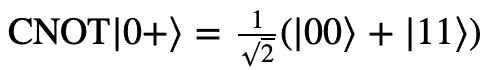

しかし、2つ目のqubitを重ねあわせの状態にするとどうなるでしょうか？

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

上の回路内では、CNOTゲートが状態に作用しています。

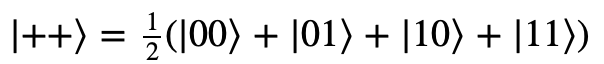

CNOTゲートは|01>と|11>の振幅を入れ替える為、変化はありません。

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘

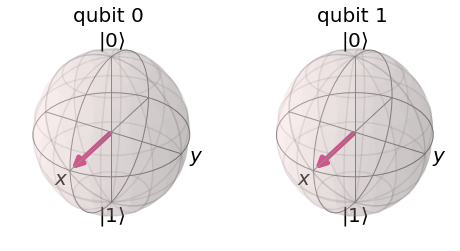

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())

# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

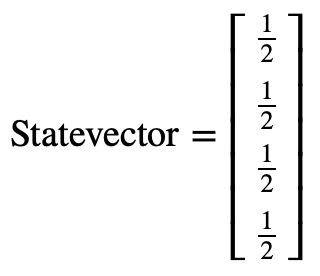

ターゲットqubitを|->の状態においてみましょう。そうすることで、マイナスの位相を持つことになります。

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

これは次のような状態を作り出します。

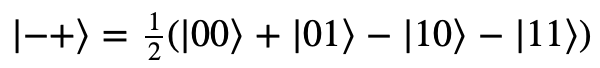

┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

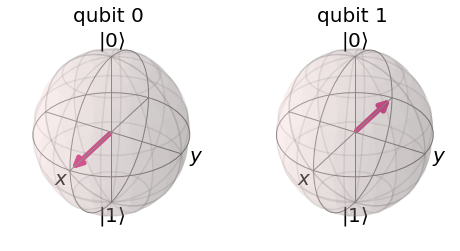

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())
# See the result
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

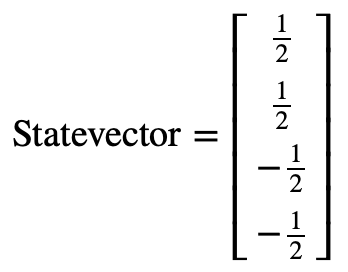

もし、CNOTゲートがこの状態に作用したら、|01>と|11>の振幅を入れ替えるので、次のような状態になると考えられます。

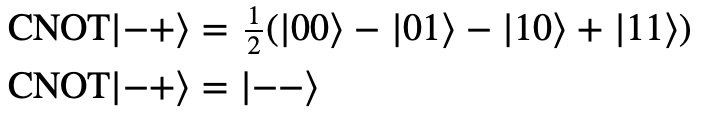

これは興味深いものです。なぜなら、ターゲットqubitの状態を変更せずに、制御qubitの状態に影響を与えるからです。

┌───┐          
q_0: ┤ H ├───────■──
     ├───┤┌───┐┌─┴─┐
q_1: ┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘

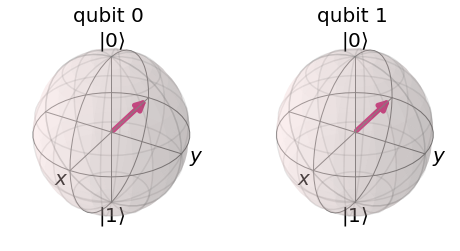

In [6]:
qc.cx(0,1)
display(qc.draw())

final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

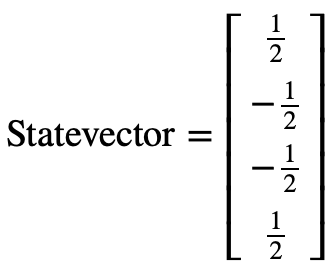

Hゲートの変換(|+> → |0> 及び |-> → |1>)を覚えている場合、CゲートをHゲートで挟むと、反対方向に動作するCNOTゲートと同等の動作が得られることがわかります。

In [7]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 
# `display` is an IPython tool, remove if it cases an error
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

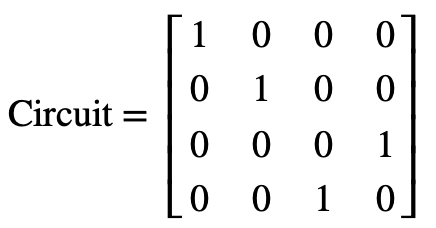

In [8]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()

┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──

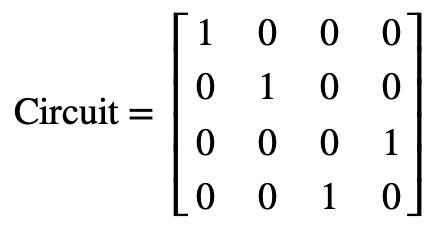

この特徴がphase kickbackの一例です。これで、次のセクションへ綺麗に進むことができます。

## 2. Phase Kickback

### 2.1 Explaining the CNOT Circuit Identity

前のセクションで以下の特性について学びました。

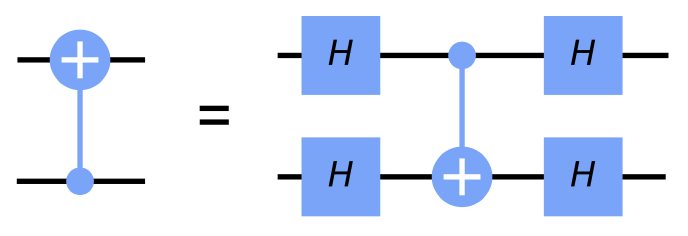

これは非常に重要であり、ほとんど全ての量子アルゴリズムで使用されるキックバック(または"phase kickback")の例です。キックバックとは、ゲートによってqubitに追加された固有値が、制御された操作によって別のqubitに"kickback"とされる場所です。例えば|->状態のqubitでXゲートを実行すると、位相が-1になることがわかりました。

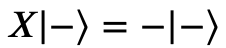

制御qubitが|0>または|1>のいずれかの状態にある場合、このフェーズは状態全体に影響しますが、グローバルフェーズである為、観察可能な影響はありませんん。

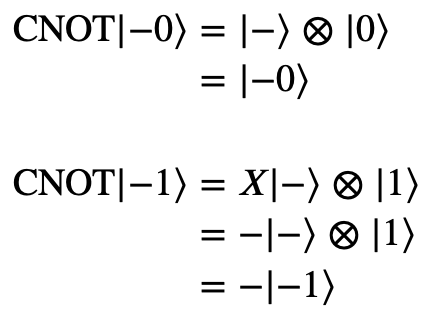

興味深い効果は、コントロールqubitが重ね合わせの状態にある時です。この位相係数は、状態|1>にある時にのみターゲットqubitに適用され、コントロールqubitに相対位相が追加されます。

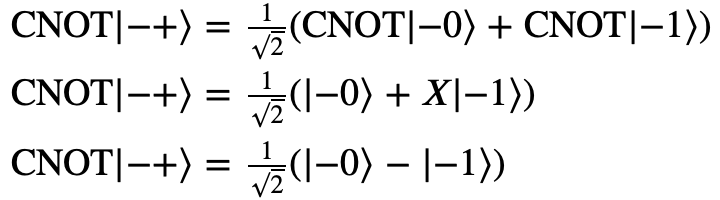

これは2つの別々のqubit状態としても記述できます。

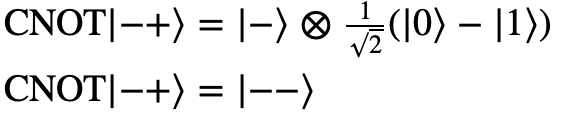

HゲートをCNOTゲートで挟むと、qubitが計算ベースから、(|+>、|->)ベースに変換され、この効果がわかります。一部のハードウェアは2つの特定のqubit間の一方向のCNOTしか許可しない為、この特徴はハードウェアで非常に役立ちます。この特徴を使用して、一方向のCNOTしか許可しないという問題を克服し、双方向のCNOTを使用できるようになります。

### 2.2 Kickback with the T-gate

別の制御された操作である、"controlled-T gate"(制御Tゲート)を見てみましょう。

In [9]:
qc = QuantumCircuit(2)
qc.cu1(pi/4, 0, 1)
qc.draw()

q_0: ─■─────
      │pi/4 
q_1: ─■─────

T-gateの行列は次の通り

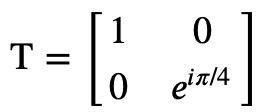

そして、制御Tゲートの行列は

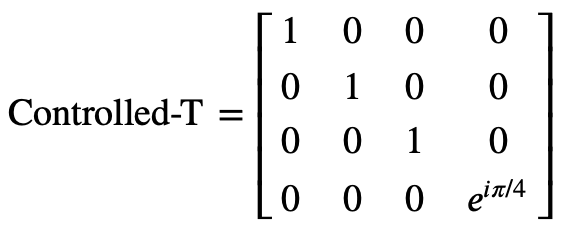

Qiskitの"unitary simulator"を使うことで、このことが確認できます。

In [10]:
qc = QuantumCircuit(2)
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
unitary_backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,unitary_backend).result().get_unitary()

q_0: ─■─────
      │pi/4 
q_1: ─■─────

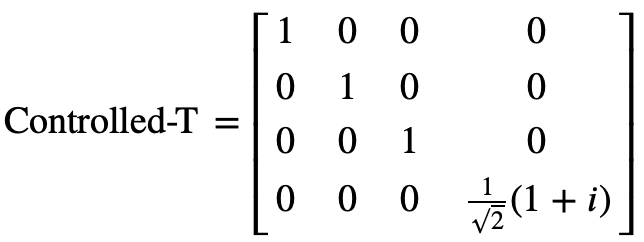

より一般的には、次のルールを使用して、制御されたU操作の行列を見ることができます。

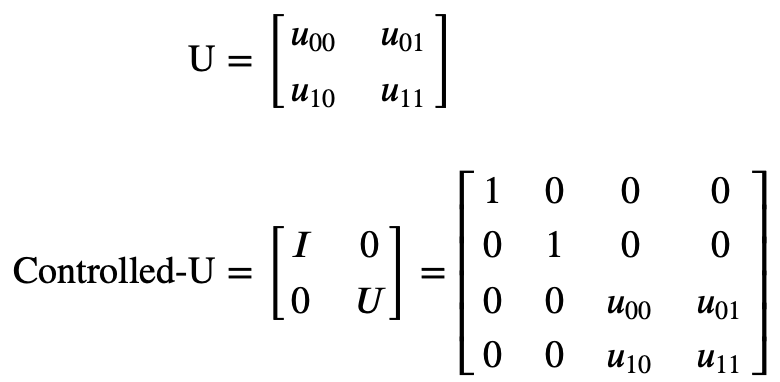

または、Qiskitのqubit配列を使用することもできます。

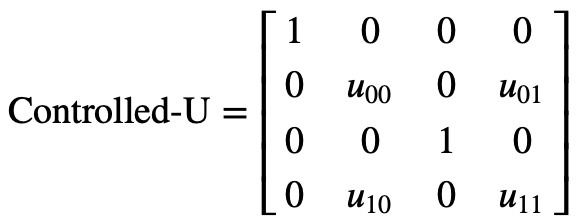

|1>の状態のqubitにTゲートを適用すると、このqubitにe^iπ/4の位相が追加されます。

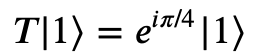

これはグローバルフェーズで、観測することはできません。ただし、|+>状態の別のqubitを使ってこの操作を制御すると、位相はグローバルではなく相対になり、コントロールqubitの相対位相が変化します。

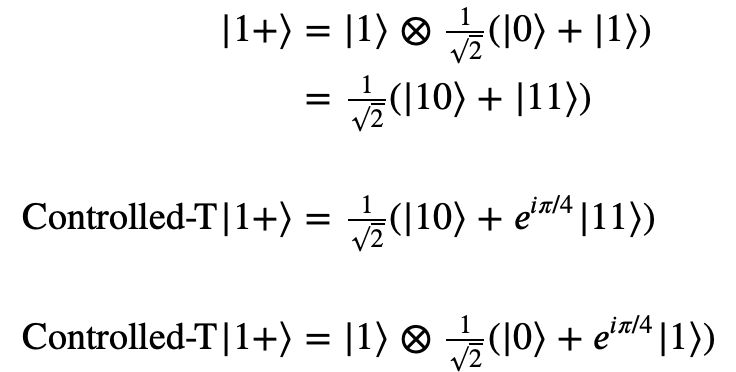

これは、ターゲットqubitを変更せずに、ブロッホ球のZ軸を中心にコントロールqubitを回転させる効果があります。これをQiskitで見てみましょう。

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

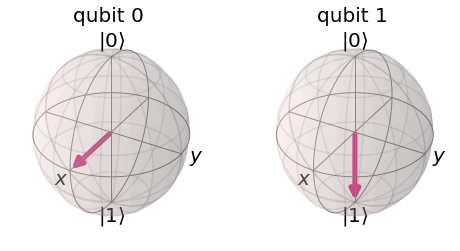

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

┌───┐       
q_0: ┤ H ├─■─────
     ├───┤ │pi/4 
q_1: ┤ X ├─■─────
     └───┘

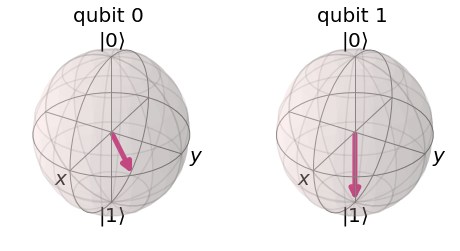

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cu1(pi/4, 0, 1)
display(qc.draw())
# See Results:
final_state = execute(qc,statevector_backend).result().get_statevector()
plot_bloch_multivector(final_state)

予想通り、右端のqubitがブロッホ球のZ軸を中心にπ/4回転したことがわかります。
この動作を確認した後、Qiskitが制御されたZ回転ゲートをこの対称的な方法(コントロールとターゲットではなく2つのコントロール)で描画する理由が明らかになるかと思います。全ての場合に明確なコントロールまたはターゲットqubitはありません。